# Team D1

# Covid-19 Detection Using Chest X-Ray Images

## Under The Guidance Of: Mrs. Preeti T

###### Importing Libraries

In [1]:
import numpy as np

C:\Users\91934\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\91934\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\91934\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
import keras
from tensorflow.keras.layers import Layer
import keras.backend as K
import tensorflow as tf
from keras.datasets import cifar10
from keras_visualizer import visualizer

###### Specifying the dataset path

In [4]:
DATASET="D:/Sem6/Minor_Project/Dataset/train"
DATASET2="D:/Sem6/Minor_Project/Dataset/test"

In [5]:
CATEGORIES=["Bacterial_Pneumonia","COVID","Normal"]

###### Loading the dataset

In [6]:
train_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.resize(img,(128,128))            
            train_data.append([img,label])

In [7]:
test_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.resize(img,(128,128))
            test_data.append([img,label])

In [8]:
print(len(train_data))
print(len(test_data))

8122
2033


In [9]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

In [10]:
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

Y=[]
for i in y_train:
    if i==0:
        Y.append("Bacterial_Pneumonia")
    elif i==1:
        Y.append("COVID")
 
    else:
        Y.append("Normal")

len(X_train),len(y_train)

(8122, 8122)

In [11]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    
Z=[]
for i in y_test:
    if i==0:
        Z.append("Bacterial_Pneumonia")
    elif i==1:
        Z.append("COVID")

    else:
        Z.append("Normal")

len(X_test),len(y_test)

(2033, 2033)

In [12]:
X_train=np.array(X_train).reshape(-1,128,128,3)
X_train=X_train/255.0
X_train.shape

X_test=np.array(X_test).reshape(-1,128,128,3)
X_test=X_test/255.0
X_test.shape

(2033, 128, 128, 3)

###### Plotting a histogram to visualise the no. of images in each class

Text(0, 0.5, 'Image Count')

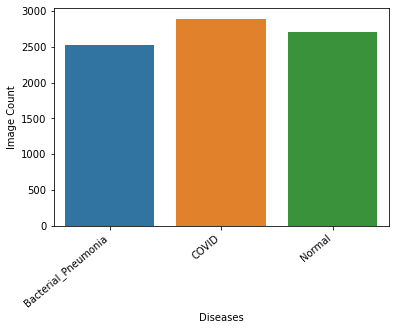

In [13]:
order=["Bacterial_Pneumonia","COVID","Normal"]

ax=sns.countplot(Y, order=order)
ax.set_xlabel("Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

ax=sns.countplot(Z, order=order)
ax.set_xlabel("Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

In [14]:
from keras.utils import to_categorical

one_hot_train=to_categorical(y_train)
one_hot_train

one_hot_test=to_categorical(y_test)
one_hot_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

#### Building a Convolutional Neural Network

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout

classifier=Sequential()

classifier.add(Conv2D(16,(3,3), input_shape=(128,128,3),activation='relu',padding="same"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(32,(3,3), activation='relu',padding="same"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu',padding="same"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=256))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation='softmax', units=3))

classifier.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1

In [16]:
# tf.config.run_functions_eagerly(True)

### Training the Convolutional Neural Network

In [17]:
hist=classifier.fit(X_train,one_hot_train,epochs=10,validation_split=0.2)

Epoch 1/10
204/204 [==============================] - 74s 355ms/step - loss: 0.8370 - accuracy: 0.5754 - val_loss: 0.6131 - val_accuracy: 0.7680
Epoch 2/10
204/204 [==============================] - 67s 326ms/step - loss: 0.5031 - accuracy: 0.7628 - val_loss: 0.4804 - val_accuracy: 0.8277
Epoch 3/10
204/204 [==============================] - 66s 325ms/step - loss: 0.4162 - accuracy: 0.8221 - val_loss: 0.3879 - val_accuracy: 0.8726
Epoch 4/10
204/204 [==============================] - 66s 324ms/step - loss: 0.3469 - accuracy: 0.8553 - val_loss: 0.3555 - val_accuracy: 0.8862
Epoch 5/10
204/204 [==============================] - 66s 324ms/step - loss: 0.3108 - accuracy: 0.8751 - val_loss: 0.2987 - val_accuracy: 0.9034
Epoch 6/10
204/204 [==============================] - 68s 332ms/step - loss: 0.2991 - accuracy: 0.8800 - val_loss: 0.2646 - val_accuracy: 0.9089
Epoch 7/10
204/204 [==============================] - 67s 331ms/step - loss: 0.2681 - accuracy: 0.8973 - val_loss: 0.2597 - val_ac

### Performace Evaluation

In [18]:
classifier.save("cnncovid(91,91).h5")

In [ ]:
classifier = keras.models.load_model("cnncovid(91,91).h5")

In [29]:
train_acc=classifier.evaluate(X_train,one_hot_train)
train_acc

254/254 [==============================] - 15s 61ms/step - loss: 0.2399 - accuracy: 0.91650s - l


[0.2399156391620636, 0.9165230393409729]

In [30]:
test_loss,test_acc=classifier.evaluate(X_test,one_hot_test)
test_loss,test_acc

64/64 [==============================] - 4s 62ms/step - loss: 0.2514 - accuracy: 0.9149


(0.25137653946876526, 0.9149040579795837)

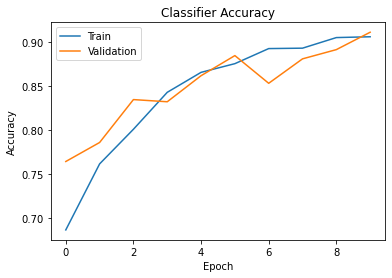

In [125]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

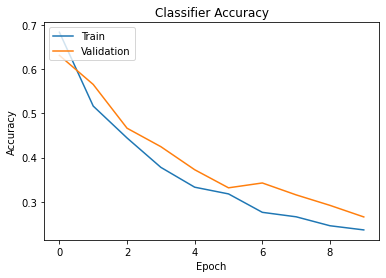

In [126]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [5]:
import cv2
img=cv2.imread("D:\\Sem6\\Minor_Project\\TEST\\Covid_1.png")
img=cv2.resize(img,(128,128))
img=np.array(img).reshape(-1,128,128,3)
img=img/255.0

In [6]:
y_pred = np.argmax(model.predict(img))

In [8]:
if y_pred == 0:
    print("Bacterial Pneumonia")
elif y_pred == 1:
    print("Covid-19")
else: 
    print("Normal")

Covid-19


In [ ]:
model.save('cnncovid(91,91).h5')

In [4]:
model=keras.models.load_model('cnncovid(91,91).h5')